In [1]:
# Imports - these are all the imports needed for the assignment
%matplotlib inline
from scipy import stats
import numpy.ma as ma
from scipy.stats import kstest, normaltest

import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# 1a) Load the nba csv files

# YOUR CODE HERE
df_2015 = pd.read_csv('clean_players_2016.csv')

In [3]:
df_2015

Unnamed: 0  PLAYER_ID          PLAYER_NAME     TEAM_ID TEAM_ABBREVIATION  \
0             0    1627773           AJ Hammons  1610612742               DAL   
1             1     201166         Aaron Brooks  1610612754               IND   
2             2     203932         Aaron Gordon  1610612753               ORL   
3             4     203940        Adreian Payne  1610612750               MIN   
4             5     201143           Al Horford  1610612738               BOS   
5             6       2744         Al Jefferson  1610612754               IND   
6             7     202329      Al-Farouq Aminu  1610612757               POR   
7             8     101187        Alan Anderson  1610612746               LAC   
8             9    1626210        Alan Williams  1610612756               PHX   
9            10     202692           Alec Burks  1610612762               UTA   
10           11     203518         Alex Abrines  1610612760               OKC   
11           12     203458             Alex Len  1610612756               PHX   
12           14     201582        Alexis Ajinca  1610612740               NOP   
13           15     203459         Allen Crabbe  1610612757               POR   
14           16     202087           Alonzo Gee  1610612743               DEN   
15           17     101161         Amir Johnson  1610612738               BOS   
16           18       2760     Anderson Varejao  1610612744               GSW   
17           19     203083       Andre Drummond  1610612765               DET   
18           20       2738       Andre Iguodala  1610612744               GSW   
19           21     203460       Andre Roberson  1610612760               OKC   
20           22     101106         Andrew Bogut  1610612739               CLE   
21           23    1626150      Andrew Harrison  1610612763               MEM   
22           24     203094     Andrew Nicholson  1610612751               BKN   
23           25     203952       Andrew Wiggins  1610612750               MIN   
24           26     203461      Anthony Bennett  1610612751               BKN   
25           27    1626148        Anthony Brown  1610612753               ORL   
26           28     203076        Anthony Davis  1610612740               NOP   
27           29     201627       Anthony Morrow  1610612741               CHI   
28           30     201229     Anthony Tolliver  1610612758               SAC   
29           31     203462       Archie Goodwin  1610612751               BKN   
..          ...        ...                  ...         ...               ...   
412         456     203504           Trey Burke  1610612764               WAS   
413         457    1626168           Trey Lyles  1610612762               UTA   
414         458     202684     Tristan Thompson  1610612739               CLE   
415         459     203584         Troy Daniels  1610612763               MEM   
416         460    1627786        Troy Williams  1610612745               HOU   
417         461     201951            Ty Lawson  1610612758               SAC   
418         462     203898          Tyler Ennis  1610612747               LAL   
419         463     204020        Tyler Johnson  1610612748               MIA   
420         464    1627755           Tyler Ulis  1610612756               PHX   
421         465     203092         Tyler Zeller  1610612738               BOS   
422         466     201936         Tyreke Evans  1610612758               SAC   
423         467       2199       Tyson Chandler  1610612756               PHX   
424         468    1626145           Tyus Jones  1610612750               MIN   
425         469       2617        Udonis Haslem  1610612748               MIA   
426         470     203506       Victor Oladipo  1610612760               OKC   
427         471       1713         Vince Carter  1610612763               MEM   
428         472    1627735      Wade Baldwin IV  1610612763               MEM   
429         473     201961      Wayn

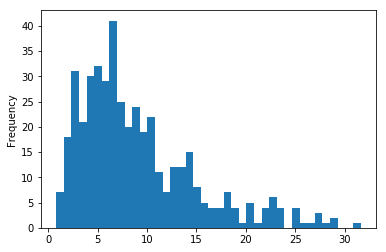

In [5]:
df_2015['PTS'].plot.hist(bins=40)

In [6]:
df_2015.columns[1:]
#pts_2015 = df_2015.as_matrix(columns=df_2015.columns[27:])
#x = pts_2015 #The array needs to be larger than 20, just an example
#mx = ma.masked_array(x)
#z,pval = mstats.normaltest(mx)

#if(pval < 0.055):
#   print("Not normal distribution")

Index(['PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION', 'AGE', 'GP',
       'W', 'L', 'W_PCT', 'MIN', 'FGM', 'FGA', 'FG_PCT', 'FG3M', 'FG3A',
       'FG3_PCT', 'FTM', 'FTA', 'FT_PCT', 'OREB', 'DREB', 'REB', 'AST', 'TOV',
       'STL', 'BLK', 'BLKA', 'PF', 'PFD', 'PTS', 'PLUS_MINUS',
       'NBA_FANTASY_PTS', 'DD2', 'TD3', 'GP_RANK', 'W_RANK', 'L_RANK',
       'W_PCT_RANK', 'MIN_RANK', 'FGM_RANK', 'FGA_RANK', 'FG_PCT_RANK',
       'FG3M_RANK', 'FG3A_RANK', 'FG3_PCT_RANK', 'FTM_RANK', 'FTA_RANK',
       'FT_PCT_RANK', 'OREB_RANK', 'DREB_RANK', 'REB_RANK', 'AST_RANK',
       'TOV_RANK', 'STL_RANK', 'BLK_RANK', 'BLKA_RANK', 'PF_RANK', 'PFD_RANK',
       'PTS_RANK', 'PLUS_MINUS_RANK', 'NBA_FANTASY_PTS_RANK', 'DD2_RANK',
       'TD3_RANK', 'CFID', 'CFPARAMS'],
      dtype='object')

In [7]:
z,pval = stats.normaltest(df_2015['PTS'])
print(z, pval)
if(pval < 0.05):
    print('PTS Is not from a Normal Dist')
else:
    print('PTS Is likley from a Normal Dist')

size = df_2015['PTS'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2015['PTS'])
stat, kpval = kstest(df_2015['PTS'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Gamma Dist')
else:
    print('PTS Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2015['PTS'])
stat, kpval = kstest(df_2015['PTS'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('PTS Is not from a Log norm Dist')
else:
    print('PTS Is likley from a Log norm Dist')

90.2989039108 2.46514321324e-20
PTS Is not from a Normal Dist
0.0346984793549 0.674314181796
PTS Is likley from a Gamma Dist
0.0282566841854 0.872045330019
PTS Is likley from a Log norm Dist


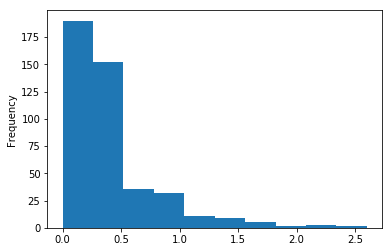

In [8]:
df_2015['BLK'].plot.hist(bins=10)

In [9]:
z,pval = stats.normaltest(df_2015['BLK'])
print(z, pval)
if(pval < 0.05):
    print('BLK Is not from a Normal Dist')
else:
    print('BLK Is likley from a Normal Dist')
    
size = df_2015['BLK'].size
x = scipy.arange(size)
param = stats.expon.fit(df_2015['BLK'])
stat, kpval = kstest(df_2015['BLK'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Exponen Dist')
else:
    print('BLK Is likley from a Exponen Dist')
param = stats.gamma.fit(df_2015['BLK'])
stat, kpval = kstest(df_2015['BLK'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Gamma Dist')
else:
    print('BLK Is likley from a Gamma Dist')
param = stats.lognorm.fit(df_2015['BLK'])
stat, kpval = kstest(df_2015['BLK'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Log norm Dist')
else:
    print('BLK Is likley from a Log norm Dist')
param = stats.chi2.fit(df_2015['BLK'])
stat, kpval = kstest(df_2015['BLK'], 'chi2', param)
print(stat, kpval)
if(kpval < 0.05):
    print('BLK Is not from a Chisq Dist')
else:
    print('BLK Is likley from a Chisq Dist')

213.238087925 4.96520908507e-47
BLK Is not from a Normal Dist
0.148816868543 5.21492893313e-09
BLK Is not from a Exponen Dist
0.202151301364 2.22044604925e-16
BLK Is not from a Gamma Dist
0.104821239109 0.000110682621423
BLK Is not from a Log norm Dist
0.190645355492 1.53210777398e-14
BLK Is not from a Chisq Dist


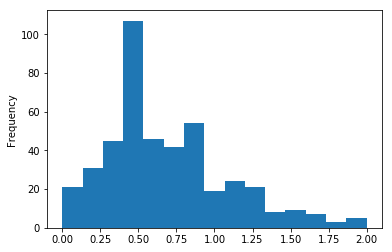

In [10]:
df_2015['STL'].plot.hist(bins=15)

In [11]:
z,pval = stats.normaltest(df_2015['STL'])
print(z, pval)
if(pval < 0.05):
    print('STL Is not from a Normal Dist')
else:
    print('STL Is likley from a Normal Dist')
    
size = df_2015['STL'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2015['STL'])
stat, kpval = kstest(df_2015['STL'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Gamma Dist')
else:
    print('STL Is likley from a Gamma Dist')

param = stats.expon.fit(df_2015['STL'])
stat, kpval = kstest(df_2015['STL'], 'expon', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Exponen Dist')
else:
    print('STL Is likley from a Exponen Dist')

param = stats.lognorm.fit(df_2015['STL'])
stat, kpval = kstest(df_2015['STL'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('STL Is not from a Log norm Dist')
else:
    print('STL Is likley from a Log norm Dist')

54.1725795147 1.72414514335e-12
STL Is not from a Normal Dist
0.0699172181503 0.0252883094783
STL Is not from a Gamma Dist
0.243820103103 0.0
STL Is not from a Exponen Dist
0.0692077968026 0.0276109035404
STL Is not from a Log norm Dist


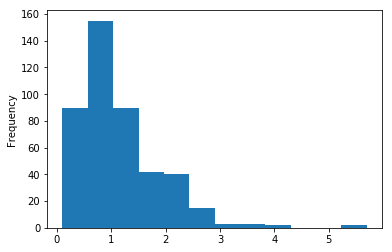

In [12]:
df_2015['TOV'].plot.hist(bins=12)

In [13]:
z,pval = stats.normaltest(df_2015['TOV'])
print(z, pval)
if(pval < 0.05):
    print('TOV Is not from a Normal Dist')
else:
    print('TOV Is likley from a Normal Dist')
    
size = df_2015['TOV'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2015['TOV'])
stat, kpval = kstest(df_2015['TOV'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Gamma Dist')
else:
    print('TOV Is likley from a Gamma Dist')
    
param = stats.lognorm.fit(df_2015['TOV'])
stat, kpval = kstest(df_2015['TOV'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('TOV Is not from a Log norm Dist')
else:
    print('TOV Is likley from a Log norm Dist')

173.245398332 2.40015751772e-38
TOV Is not from a Normal Dist
0.0647812924991 0.0468177683227
TOV Is not from a Gamma Dist
0.0514658167681 0.185841429712
TOV Is likley from a Log norm Dist


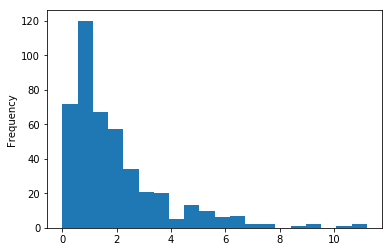

In [14]:
df_2015['AST'].plot.hist(bins=20)

In [15]:
z,pval = stats.normaltest(df_2015['AST'])
print(z, pval)
if(pval < 0.05):
    print('AST Is not from a Normal Dist')
else:
    print('AST Is likley from a Normal Dist')

size = df_2015['AST'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2015['AST'])
stat, kpval = kstest(df_2015['AST'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Gamma Dist')
else:
    print('AST Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2015['AST'])
stat, kpval = kstest(df_2015['AST'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('AST Is not from a Log norm Dist')
else:
    print('AST Is likley from a Log norm Dist')

197.518712181 1.28634248509e-43
AST Is not from a Normal Dist
0.0703883040138 0.0238432027262
AST Is not from a Gamma Dist
0.0390785387156 0.50526385882
AST Is likley from a Log norm Dist


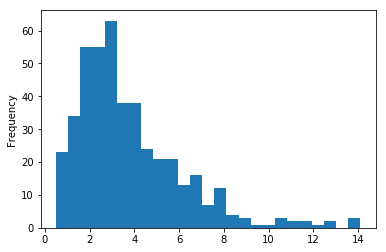

In [16]:
df_2015['REB'].plot.hist(bins=25)

In [17]:
z,pval = stats.normaltest(df_2015['REB'])
print(z, pval)
if(pval < 0.05):
    print('REB Is not from a Normal Dist')
else:
    print('REB Is likley from a Normal Dist')
    
size = df_2015['REB'].size
x = scipy.arange(size)
param = stats.gamma.fit(df_2015['REB'])
stat, kpval = kstest(df_2015['REB'], 'gamma', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Gamma Dist')
else:
    print('REB Is likley from a Gamma Dist')

param = stats.lognorm.fit(df_2015['REB'])
stat, kpval = kstest(df_2015['REB'], 'lognorm', param)
print(stat, kpval)
if(kpval < 0.05):
    print('REB Is not from a Log norm Dist')
else:
    print('REB Is likley from a Log norm Dist')

131.091116365 3.41920994601e-29
REB Is not from a Normal Dist
0.0400877629089 0.470485393014
REB Is likley from a Gamma Dist
0.0288411395533 0.855764194973
REB Is likley from a Log norm Dist
